In [3]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
#performing data agumentation on test data
test_datagen = ImageDataGenerator(rescale = 1./255)

In [5]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('C:/Users/varun/OneDrive/Desktop/project/data (1)/data/train_set',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 316 images belonging to 3 classes.


In [6]:
test_set = test_datagen.flow_from_directory('C:/Users/varun/OneDrive/Desktop/project/data (1)/data/test_set',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 120 images belonging to 3 classes.


In [9]:
print(training_set.class_indices)#checking the number of classes

{'crack': 0, 'flakes': 1, 'roof': 2}


In [10]:
from collections import Counter as c
c(training_set .labels)

Counter({0: 86, 1: 176, 2: 54})

In [11]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [12]:
IMAGE_SIZE=[224,224]
train_path="C:/Users/varun/OneDrive/Desktop/project/data (1)/data/train_set"
valid_path="C:/Users/varun/OneDrive/Desktop/project/data (1)/data/test_set"

In [13]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [14]:
for layer in vgg16.layers:
    layer.trainable = False

In [22]:
folders = glob('C:/Users/varun/OneDrive/Desktop/project/data (1)/data/train_set/*')

In [23]:
folders

['C:/Users/varun/OneDrive/Desktop/project/data (1)/data/train_set\\crack',
 'C:/Users/varun/OneDrive/Desktop/project/data (1)/data/train_set\\flakes',
 'C:/Users/varun/OneDrive/Desktop/project/data (1)/data/train_set\\roof']

In [24]:
# our layers - you can add more if you want
x = Flatten()(vgg16.output)

In [25]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [26]:

# view the structure of the model
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [27]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [28]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\varun\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1935: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
10/10 [==============================] - 50s 5s/step - loss: 1.5379 - accuracy: 0.5032 - val_loss: 1.0313 - val_accuracy: 0.4917
Epoch 2/10
10/10 [==============================] - 59s 6s/step - loss: 0.7967 - accuracy: 0.6614 - val_loss: 0.6071 - val_accuracy: 0.7750
Epoch 3/10
10/10 [==============================] - 57s 6s/step - loss: 0.5546 - accuracy: 0.7753 - val_loss: 0.9991 - val_accuracy: 0.6667
Epoch 4/10
10/10 [==============================] - 57s 6s/step - loss: 0.3225 - accuracy: 0.8576 - val_loss: 0.5607 - val_accuracy: 0.7917
Epoch 5/10
10/10 [==============================] - 57s 6s/step - loss: 0.2613 - accuracy: 0.9051 - val_loss: 0.5508 - val_accuracy: 0.8000
Epoch 6/10
10/10 [==============================] - 56s 6s/step - loss: 0.2197 - accuracy: 0.9177 - val_loss: 0.5803 - val_accuracy: 0.8000
Epoch 7/10
10/10 [==============================] - 55s 6s/step - loss: 0.1825 - accuracy: 0.9494 - val_loss: 0.6040 - val_accuracy: 0.7750
Epoch 8/10
10/10 [==

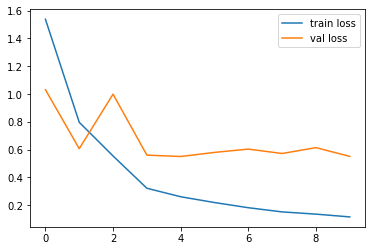

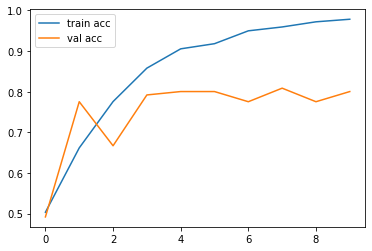

<Figure size 432x288 with 0 Axes>

In [29]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [30]:
# save it as a h5 file

from tensorflow.keras.models import load_model

model.save('model_building_defects_vgg16.h5')

In [31]:
from tensorflow.keras.models import load_model
from keras.preprocessing import image
model = load_model("model_building_defects_vgg16.h5") #loading the model for testing

In [33]:
img=image.load_img(r"C:/Users/varun/OneDrive/Desktop/project/data (1)/data/test_set/flakes/38.jpg",target_size=(224,224))
x=image.img_to_array(img)
#x=x/255
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
#model.predict(img_data)
a=np.argmax(model.predict(img_data), axis=1)


In [34]:
a

array([1], dtype=int64)

In [35]:
index=['crack','flakes','roof']
result=str(index[a[0]])
result

'flakes'

In [36]:
!pip install jupyterthemes as jt

  Using cached jupyterthemes-0.20.0-py2.py3-none-any.whl (7.0 MB)


ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


In [37]:
!jt -t monokai

'jt' is not recognized as an internal or external command,
operable program or batch file.


In [38]:
!jt -r

'jt' is not recognized as an internal or external command,
operable program or batch file.
